In [2]:
import numpy as np 
import pandas as pd 
import urllib.request
from urllib.request import urlretrieve, Request, urlopen
import json
import time
import os
import fnmatch
import re
from bs4 import BeautifulSoup
import requests
import csv

We plan to scrape all roses from the rose database available at garden.org

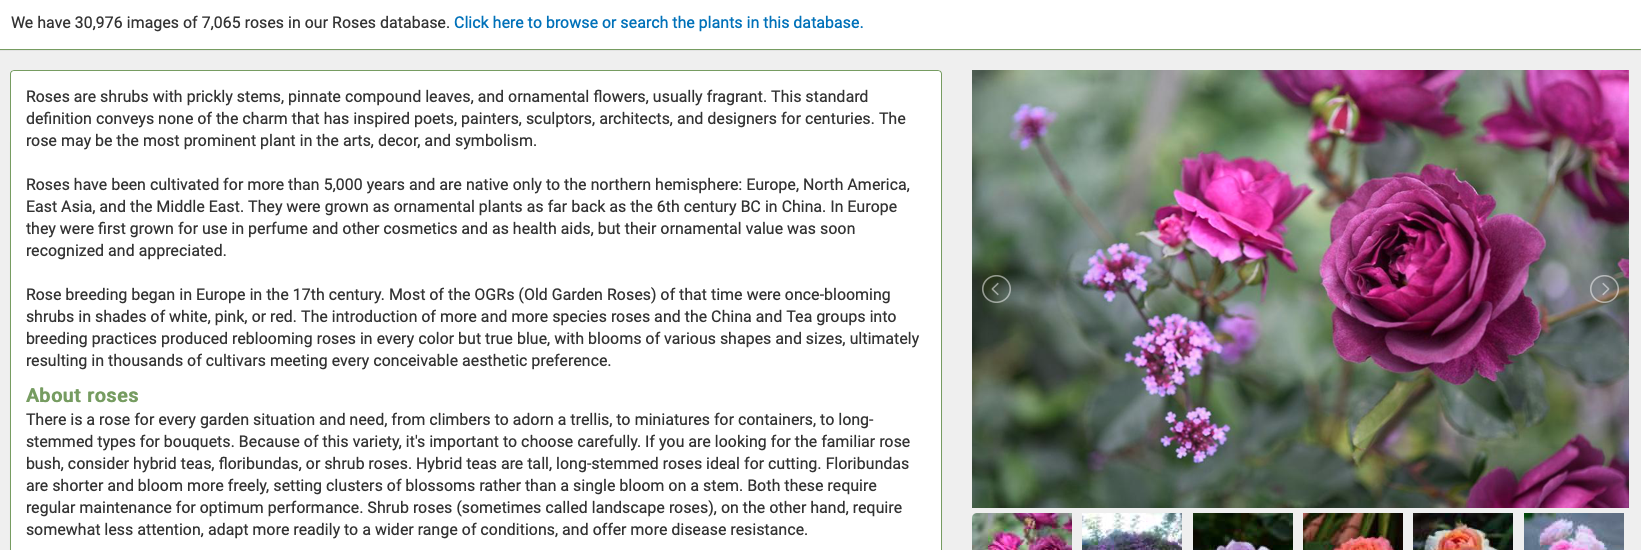


URL structure:
    
    First page  - https://garden.org/plants/browse/plants/children/181506/?offset=0
    Second page - https://garden.org/plants/browse/plants/children/181506/?offset=20
    Third page  - https://garden.org/plants/browse/plants/children/181506/?offset=40
    
    
Looks like navigation to the next page can be achived by changing parameter offset by increasing by 20 each time. 

In [11]:
list_of_pages_to_scrape = []
for i in range(0,354):
    add = i*20
    url = "https://garden.org/plants/browse/plants/children/181506/?offset=0" + str(add)
    print(url)
    list_of_pages_to_scrape.append(url)

https://garden.org/plants/browse/plants/children/181506/?offset=00
https://garden.org/plants/browse/plants/children/181506/?offset=020
https://garden.org/plants/browse/plants/children/181506/?offset=040
https://garden.org/plants/browse/plants/children/181506/?offset=060
https://garden.org/plants/browse/plants/children/181506/?offset=080
https://garden.org/plants/browse/plants/children/181506/?offset=0100
https://garden.org/plants/browse/plants/children/181506/?offset=0120
https://garden.org/plants/browse/plants/children/181506/?offset=0140
https://garden.org/plants/browse/plants/children/181506/?offset=0160
https://garden.org/plants/browse/plants/children/181506/?offset=0180
https://garden.org/plants/browse/plants/children/181506/?offset=0200
https://garden.org/plants/browse/plants/children/181506/?offset=0220
https://garden.org/plants/browse/plants/children/181506/?offset=0240
https://garden.org/plants/browse/plants/children/181506/?offset=0260
https://garden.org/plants/browse/plants/

Below I comented out test scripts that I made befoe I created proper loops. 

In [ ]:
# specify which URL/web page we are going to be scraping
# url = "https://garden.org/plants/browse/plants/children/181506/?offset=0"

# open the url and put the HTML into the page variable
# req = Request(url, headers={'User-Agent': 'Mozilla/5.0'})
# webpage = urlopen(req).read()

# parse the HTML from our URL into the BeautifulSoup parse tree format
# soup = BeautifulSoup(webpage, "lxml")

#for i in soup.select("td"):
    #print(i.find('a').get('href'))
    #print(i)

In [24]:
list_of_rose_url = []

for u in list_of_pages_to_scrape:
    time.sleep(1)
    req = Request(u, headers={'User-Agent': 'Mozilla/5.0'})
    webpage = urlopen(req).read()

    soup = BeautifulSoup(webpage, "lxml")
    for i in soup.select("td"):
        print(i.find('a').get('href'))
        rose_url = i.find('a').get('href')
        list_of_rose_url.append(rose_url)    

/plants/view/181506/Roses-Rosa/
/plants/view/181506/Roses-Rosa/
/plants/view/632011/Rose-Rosa-abietina/
/plants/view/632011/Rose-Rosa-abietina/
/plants/view/632012/Rose-Rosa-abrica/
/plants/view/632012/Rose-Rosa-abrica/
/plants/view/632013/Rose-Rosa-abutalybovii/
/plants/view/632013/Rose-Rosa-abutalybovii/
/plants/view/632014/Rose-Rosa-abyssinica/
/plants/view/632014/Rose-Rosa-abyssinica/
/plants/view/478177/Rose-Rosa-acicularis/
/plants/view/478177/Rose-Rosa-acicularis/
/plants/view/632015/Rose-Rosa-acicularis-subsp-acicularis/
/plants/view/632015/Rose-Rosa-acicularis-subsp-acicularis/
/plants/view/478292/Says-Prickly-Rose-Rosa-acicularis-subsp-sayi/
/plants/view/478292/Says-Prickly-Rose-Rosa-acicularis-subsp-sayi/
/plants/view/632016/Rose-Rosa-adenophylla/
/plants/view/632016/Rose-Rosa-adenophylla/
/plants/view/478464/Rose-Rosa-agrestis/
/plants/view/478464/Rose-Rosa-agrestis/
/plants/view/632018/Rose-Rosa-alabukensis/
/plants/view/632018/Rose-Rosa-alabukensis/
/plants/view/479189/Ro

URL structure for individual rose page 

https://garden.org/plants/view/640915/Rose-Rosa-blanda-var-hispida/

Navigation can be done as base_url + Scraped part of url 

Base_url = 'https://garden.org/'

In [5]:
# specify which URL/web page we are going to be scraping
url = "https://garden.org/plants/view/632011/Rose-Rosa-abietina/"

# open the url and put the HTML into the page variable
req = Request(url, headers={'User-Agent': 'Mozilla/5.0'})
webpage = urlopen(req).read()

# parse the HTML from our URL into the BeautifulSoup parse tree format
soup = BeautifulSoup(webpage, "lxml")

#for i in soup.select("tr"):
    #print(i.text)

In [44]:
table = soup.find_all("table")

rows = []
for td in soup.find_all("table"):
    cells = []
    # grab all td tags in this table row
    cells.append(url)
    tds = td.find_all("td")
    if len(tds) == 0:
        # if no td tags, search for th tags
        # can be found especially in wikipedia tables below the table
        ths = td.find_all("th")
        for th in ths:
            cells.append(th.text.strip())
    else:
        # use regular td tags
        for t in tds:
            cells.append(t.text.strip())
    rows.append(cells)

In [45]:
rows

[['https://garden.org/plants/view/632011/Rose-Rosa-abietina/',
  'Plant Habit:',
  'Shrub',
  'Life cycle:',
  'Perennial',
  'Sun Requirements:',
  'Full Sun',
  'Soil pH Preferences:',
  'Moderately acid (5.6 – 6.0)\nSlightly acid (6.1 – 6.5)\nNeutral (6.6 – 7.3)\nSlightly alkaline (7.4 – 7.8)',
  'Leaves:',
  'Deciduous',
  'Flowers:',
  'Showy',
  'Uses:',
  'Cut Flower',
  'Wildlife Attractant:',
  'Bees',
  'Propagation: Other methods:',
  'Cuttings: Stem\nCuttings: Tip',
  'Miscellaneous:',
  'With thorns/spines/prickles/teeth']]

In [30]:
pd.DataFrame(rows)

0   \
0  https://garden.org/plants/view/478177/Rose-Ros...   
1  https://garden.org/plants/view/478177/Rose-Ros...   
2  https://garden.org/plants/view/478177/Rose-Ros...   
3  https://garden.org/plants/view/478177/Rose-Ros...   
4  https://garden.org/plants/view/478177/Rose-Ros...   

                                                  1                     2   \
0                                        Arctic Rose      Circumpolar Rose   
1                                        Bloom size:       Small: under 2"   
2                                       Plant Habit:                 Shrub   
3  Posted by robertduval14 (Mason, New Hampshire ...                  None   
4  Help identifying this rose species by bennysplace  Jun 9, 2016 10:02 AM   

               3          4                  5                   6   \
0  Oo-Takane-Bara       None               None                None   
1    Bloom shape:       Flat       Petal count:  Single: 1-7 petals   
2     Life cycle:  Perennial  Sun Requirements:            Full Sun   
3            None       None               None                None   
4               4       None               None                None   

                   7                                   8   \
0                None                                None   
1   Rose bloom color:  White and white blend\nMedium pink   
2  Water Preferences:                               Mesic   
3                None                                None   
4                None                                None   

                     9   ...                   39            40  \
0                  None  ...                 None          None   
1              Rebloom:  ...                 None          None   
2  Soil pH Preferences:  ...  Propagation: Seeds:  Self fertile   
3                  None  ...                 None          None   
4                  None  ...                 None          None   

                            41                             42            43  \
0                         None                           None          None   
1                         None                           None          None   
2  Propagation: Other methods:  Cuttings: Stem\nCuttings: Tip  Pollinators:   
3                         None                           None          None   
4                         None                           None          None   

                      44              45                                 46  \
0                   None            None                               None   
1                   None            None                               None   
2  Self\nVarious insects  Miscellaneous:  With thorns/spines/prickles/teeth   
3                   None            None                               None   
4                   None            None                               None   

                         47                                           48  
0                      None                                         None  
1                      None                                         None  
2  Awards and Recognitions:  Other: Provincial Flower of Alberta, Canada  
3                      None                                         None  
4                      None                                         None  

[5 rows x 49 columns]

In [20]:
test_list = list_of_rose_url[0:10]

In [21]:
test_list

['/plants/view/181506/Roses-Rosa/',
 '/plants/view/181506/Roses-Rosa/',
 '/plants/view/632011/Rose-Rosa-abietina/',
 '/plants/view/632011/Rose-Rosa-abietina/',
 '/plants/view/632012/Rose-Rosa-abrica/',
 '/plants/view/632012/Rose-Rosa-abrica/',
 '/plants/view/632013/Rose-Rosa-abutalybovii/',
 '/plants/view/632013/Rose-Rosa-abutalybovii/',
 '/plants/view/632014/Rose-Rosa-abyssinica/',
 '/plants/view/632014/Rose-Rosa-abyssinica/']

In [22]:
t_list = (set(test_list))
t_list

{'/plants/view/181506/Roses-Rosa/',
 '/plants/view/632011/Rose-Rosa-abietina/',
 '/plants/view/632012/Rose-Rosa-abrica/',
 '/plants/view/632013/Rose-Rosa-abutalybovii/',
 '/plants/view/632014/Rose-Rosa-abyssinica/'}

In [23]:
t_list = (set(list_of_rose_url))

In [ ]:
list_of_proper_rose_url = []
Base_url = 'https://garden.org'

with open('rose_scrape_garden_org.csv','w',newline='',encoding='utf-8') as f:
    w = csv.writer(f)
    headers = 'Rose_name URL Synonyms ARS Origin Class Bloom Habit Growing Parentage Notes'
    bytes_headers = bytes(headers, 'utf-8')
    w.writerow(headers.split())

    for u in t_list:
        rose_fill_url = Base_url +str(u)
        print(rose_fill_url)
        time.sleep(1)
        req = Request(rose_fill_url, headers={'User-Agent': 'Mozilla/5.0'})
        webpage = urlopen(req).read()

        soup = BeautifulSoup(webpage, "lxml")
        table = soup.find_all("table")

        rows = []
        for td in soup.find_all("table"):
            cells = []
            # grab all td tags in this table row
            cells.append(rose_fill_url)
            tds = td.find_all("td")
            if len(tds) == 0:
                # if no td tags, search for th tags
                # can be found especially in wikipedia tables below the table
                ths = td.find_all("th")
                for th in ths:
                    cells.append(th.text.strip())
            else:
                # use regular td tags
                for t in tds:
                    cells.append(t.text.strip())
            rows.append(cells)
            print(len(cells))
            print(cells)
            print(len(rows))
            
            w.writerow([rose_fill_url, rows])


https://garden.org/plants/view/2276/Rose-Rosa-Pink-Favorite/
3
['https://garden.org/plants/view/2276/Rose-Rosa-Pink-Favorite/', "'Pink Favorite'", "'Pink Favourite'"]
1
19
['https://garden.org/plants/view/2276/Rose-Rosa-Pink-Favorite/', 'Bloom size:', 'Large: 4-5"', 'Bloom shape:', 'High-centered', 'Petal count:', 'full: 26-40 petals', 'Rose bloom color:', 'Medium pink', 'Rebloom:', 'Good', 'Class:', 'Hybrid tea', 'Growth Habit:', 'Medium, 3-4 feet, upright', 'Fragrance:', 'Mild', 'Hybridizer & year:', 'Gordon J. Von Abrams, 1956']
2
33
['https://garden.org/plants/view/2276/Rose-Rosa-Pink-Favorite/', 'Plant Habit:', 'Shrub', 'Life cycle:', 'Perennial', 'Sun Requirements:', 'Full Sun', 'Soil pH Preferences:', 'Moderately acid (5.6 – 6.0)\nSlightly acid (6.1 – 6.5)\nNeutral (6.6 – 7.3)\nSlightly alkaline (7.4 – 7.8)', 'Plant Height:', '3-4 feet', 'Plant Spread:', '1-2 feet', 'Leaves:', 'Deciduous', 'Flowers:', 'Showy\nFragrant', 'Flower Color:', 'Pink', 'Flower Time:', 'Spring\nSummer\nF

In [3]:
pd.set_option('max_colwidth', -1)

In [2]:
df = pd.read_csv("rose_scrape_garden_org.csv", low_memory=False)
df

Rose_name  \
0      https://garden.org/plants/view/2276/Rose-Rosa-...   
1      https://garden.org/plants/view/2276/Rose-Rosa-...   
2      https://garden.org/plants/view/2276/Rose-Rosa-...   
3      https://garden.org/plants/view/2276/Rose-Rosa-...   
4      https://garden.org/plants/view/4272/Rose-Rosa-...   
5      https://garden.org/plants/view/4272/Rose-Rosa-...   
6      https://garden.org/plants/view/4272/Rose-Rosa-...   
7      https://garden.org/plants/view/4272/Rose-Rosa-...   
8      https://garden.org/plants/view/1508/Rose-Rosa-...   
9      https://garden.org/plants/view/1508/Rose-Rosa-...   
10     https://garden.org/plants/view/1508/Rose-Rosa-...   
11     https://garden.org/plants/view/2950/Rose-Rosa-...   
12     https://garden.org/plants/view/2950/Rose-Rosa-...   
13     https://garden.org/plants/view/2950/Rose-Rosa-...   
14     https://garden.org/plants/view/715918/Rose-Ros...   
15     https://garden.org/plants/view/715918/Rose-Ros...   
16     https://garden.org/plants/view/715918/Rose-Ros...   
17     https://garden.org/plants/view/2428/Rose-Rosa-...   
18     https://garden.org/plants/view/2428/Rose-Rosa-...   
19     https://garden.org/plants/view/553819/Rose-Ros...   
20     https://garden.org/plants/view/553819/Rose-Ros...   
21     https://garden.org/plants/view/553819/Rose-Ros...   
22     https://garden.org/plants/view/553819/Rose-Ros...   
23     https://garden.org/plants/view/3622/Rose-Rosa-...   
24     https://garden.org/plants/view/3622/Rose-Rosa-...   
25     https://garden.org/plants/view/3622/Rose-Rosa-...   
26     https://garden.org/plants/view/2419/Rose-Rosa-...   
27     https://garden.org/plants/view/2419/Rose-Rosa-...   
28     https://garden.org/plants/view/2419/Rose-Rosa-...   
29     https://garden.org/plants/view/2586/Rose-Rosa-...   
...                                                  ...   
10309  https://garden.org/plants/view/3978/Rose-Rosa-...   
10310  https://garden.org/plants/view/3978/Rose-Rosa-...   
10311  https://garden.org/plants/view/706250/Rose-Ros...   
10312  https://garden.org/plants/view/706250/Rose-Ros...   
10313  https://garden.org/plants/view/706250/Rose-Ros...   
10314  https://garden.org/plants/view/706250/Rose-Ros...   
10315  https://garden.org/plants/view/2129/Rose-Rosa-...   
10316  https://garden.org/plants/view/2129/Rose-Rosa-...   
10317  https://garden.org/plants/view/2129/Rose-Rosa-...   
10318  https://garden.org/plants/view/2129/Rose-Rosa-...   
10319  https://garden.org/plants/view/629/Rose-Rosa-G...   
10320  https://garden.org/plants/view/629/Rose-Rosa-G...   
10321  https://garden.org/plants/view/629/Rose-Rosa-G...   
10322  https://garden.org/plants/view/629/Rose-Rosa-G...   
10323  https://garden.org/plants/view/1356/Rose-Rosa-...   
10324  https://garden.org/plants/view/1356/Rose-Rosa-...   
10325  https://garden.org/plants/view/1356/Rose-Rosa-...   
10326  https://garden.org/plants/view/1356/Rose-Rosa-...   
10327  https://garden.org/plants/view/1499/Rose-Rosa-...   
10328  https://garden.org/plants/view/1499/Rose-Rosa-...   
10329  https://garden.org/plants/view/1499/Rose-Rosa-...   
10330  https://garden.org/plants/view/1499/Rose-Rosa-...   
10331  https://garden.org/plants/view/1781/Rose-Rosa-...   
10332  https://garden.org/plants/view/1781/Rose-Rosa-...   
10333  https://garden.org/plants/view/1781/Rose-Rosa-...   
10334  https://garden.org/plants/view/1781/Rose-Rosa-...   
10335  https://garden.org/plants/view/1781/Rose-Rosa-...   
10336  https://garden.org/plants/view/555/Rose-Rosa-S...   
10337  https://garden.org/plants/view/555/Rose-Rosa-S...   
10338  https://garden.org/plants/view/555/Rose-Rosa-S...   

                                                     URL  Synonyms  ARS  \
0      [['https://garden.org/plants/view/2276/Rose-Ro...       NaN  NaN   
1      [['https://garden.org/plants/view/2276/Rose-Ro...       NaN  NaN   
2      [['https://garden.org/plants/view/2276/Rose-Ro...       NaN  NaN   
3      [['https://garden.o

In [4]:
df.head(100)

Rose_name  \
0   https://garden.org/plants/view/2276/Rose-Rosa-Pink-Favorite/            
1   https://garden.org/plants/view/2276/Rose-Rosa-Pink-Favorite/            
2   https://garden.org/plants/view/2276/Rose-Rosa-Pink-Favorite/            
3   https://garden.org/plants/view/2276/Rose-Rosa-Pink-Favorite/            
4   https://garden.org/plants/view/4272/Rose-Rosa-Trade-Winds/              
5   https://garden.org/plants/view/4272/Rose-Rosa-Trade-Winds/              
6   https://garden.org/plants/view/4272/Rose-Rosa-Trade-Winds/              
7   https://garden.org/plants/view/4272/Rose-Rosa-Trade-Winds/              
8   https://garden.org/plants/view/1508/Rose-Rosa-Abba-Dabba/               
9   https://garden.org/plants/view/1508/Rose-Rosa-Abba-Dabba/               
10  https://garden.org/plants/view/1508/Rose-Rosa-Abba-Dabba/               
11  https://garden.org/plants/view/2950/Rose-Rosa-Maid-of-Honor-Cl/         
12  https://garden.org/plants/view/2950/Rose-Rosa-Maid-of-Honor-Cl/         
13  https://garden.org/plants/view/2950/Rose-Rosa-Maid-of-Honor-Cl/         
14  https://garden.org/plants/view/715918/Rose-Rosa-Pois-de-Senteur/        
15  https://garden.org/plants/view/715918/Rose-Rosa-Pois-de-Senteur/        
16  https://garden.org/plants/view/715918/Rose-Rosa-Pois-de-Senteur/        
17  https://garden.org/plants/view/2428/Rose-Rosa-Raymond-Chenault/         
18  https://garden.org/plants/view/2428/Rose-Rosa-Raymond-Chenault/         
19  https://garden.org/plants/view/553819/Rose-Rosa-Lynns-Legacy/           
20  https://garden.org/plants/view/553819/Rose-Rosa-Lynns-Legacy/           
21  https://garden.org/plants/view/553819/Rose-Rosa-Lynns-Legacy/           
22  https://garden.org/plants/view/553819/Rose-Rosa-Lynns-Legacy/           
23  https://garden.org/plants/view/3622/Rose-Rosa-Blessings-Cl/             
24  https://garden.org/plants/view/3622/Rose-Rosa-Blessings-Cl/             
25  https://garden.org/plants/view/3622/Rose-Rosa-Blessings-Cl/             
26  https://garden.org/plants/view/2419/Rose-Rosa-Purple-Elf/               
27  https://garden.org/plants/view/2419/Rose-Rosa-Purple-Elf/               
28  https://garden.org/plants/view/2419/Rose-Rosa-Purple-Elf/               
29  https://garden.org/plants/view/2586/Rose-Rosa-Yellow-Queen-Elizabeth/   
..                                                                    ...   
70  https://garden.org/plants/view/2451/Rose-Rosa-Cupcake/                  
71  https://garden.org/plants/view/2451/Rose-Rosa-Cupcake/                  
72  https://garden.org/plants/view/2451/Rose-Rosa-Cupcake/                  
73  https://garden.org/plants/view/2451/Rose-Rosa-Cupcake/                  
74  https://garden.org/plants/view/2451/Rose-Rosa-Cupcake/                  
75  https://garden.org/plants/view/4425/Rose-Rosa-Victorian-Lace/           
76  https://garden.org/plants/view/4425/Rose-Rosa-Victorian-Lace/           
77  https://garden.org/plants/view/4425/Rose-Rosa-Victorian-Lace/           
78  https://garden.org/plants/view/4425/Rose-Rosa-Victorian-Lace/           
79  https://garden.org/plants/view/527906/Rose-Rosa-Ivory-Drift/            
80  https://garden.org/plants/view/527906/Rose-Rosa-Ivory-Drift/            
81  https://garden.org/plants/view/527906/Rose-Rosa-Ivory-Drift/            
82  https://garden.org/plants/view/1812/Rose-Rosa-Maman-Cochet/             
83  https://garden.org/plants/view/1812/Rose-Rosa-Maman-Cochet/             
84  https://garden.org/plants/view/1812/Rose-Rosa-Maman-Cochet/             
85  https://garden.org/plants/view/1812/Rose-Rosa-Maman-Cochet/             
86  https://garden.org/plants/view/1812/Rose-Rosa-Maman-Cochet/             
87  https://garden.org/plants/view/1812/Rose-Rosa-Maman-Cochet/             
88  https://garden.org/plants/view/2533/Rose-Rosa-Shannon/                  
89  https://garden.org/plants/view/2533/Rose-Rosa-Shannon/                  
90  https://garden.org/plants/view/2533/Rose-Rosa-Shannon/  

In [29]:
df.loc[0,:]

Rose_name    [['https://garden.org/plants/view/632011/Rose-Rosa-abietina/', 'Plant Habit:', 'Shrub', 'Life cycle:', 'Perennial', 'Sun Requirements:', 'Full Sun', 'Soil pH Preferences:', 'Moderately acid (5.6 – 6.0)\nSlightly acid (6.1 – 6.5)\nNeutral (6.6 – 7.3)\nSlightly alkaline (7.4 – 7.8)', 'Leaves:', 'Deciduous', 'Flowers:', 'Showy', 'Uses:', 'Cut Flower', 'Wildlife Attractant:', 'Bees', 'Propagation: Other methods:', 'Cuttings: Stem\nCuttings: Tip'], ['https://garden.org/plants/view/632011/Rose-Rosa-abietina/', 'Posted by Mindy03 (Delta KY) on Apr 22, 2012 1:41 PMHoney bees get pollen from this plant.  Single flowered varieties are best.  [ Reply to this comment |    \n\n\n\n\n ]', 'Posted by Newyorkrita (North Shore, Long Island, NY ) on Sep 19, 2013 4:41 PMRoses, I love roses. All colors and shapes and sizes. Small single roses to thickly shaped old garden look-alikes. I grow some hybrid teas, but mostly I grow floribundas and shrub roses.[ Reply to this comment |    \n\n\n\n\n

In [5]:
df.Rose_name.value_counts()

https://garden.org/plants/view/186386/Lady-Banks-White-Rosa-banksiae/           7
https://garden.org/plants/view/3871/Lady-Banks-Yellow-Rosa-banksiae-f-lutea/    7
https://garden.org/plants/view/1635/Rose-Rosa-Sheilas-Perfume/                  6
https://garden.org/plants/view/2652/Rose-Rosa-Sonia/                            6
https://garden.org/plants/view/19/Rose-Rosa-Crepuscule/                         6
https://garden.org/plants/view/3846/Rose-Rosa-Aloha/                            6
https://garden.org/plants/view/2064/Rose-Rosa-Westerland/                       6
https://garden.org/plants/view/1036/Rose-Rosa-Livin-Easy/                       6
https://garden.org/plants/view/1638/Rose-Rosa-Pink-Pet/                         6
https://garden.org/plants/view/123/Rose-Rosa-Winchester-Cathedral/              6
https://garden.org/plants/view/703290/Rose-Rosa-Campfire/                       6
https://garden.org/plants/view/180948/Rose-Rosa-rugosa/                         6
https://garden.o

In [9]:
# checking if we scraped all roses from the website or not.
# Based on the description of the database it should contain 7,065 records.
# we have 353 pages with 20 roses listed and 1 page with 5 roses listed
# This means that the database definately contains 7065 rocords
df.Rose_name.nunique()

2993

In [14]:
df.tail(10)

Rose_name  \
10329  https://garden.org/plants/view/1499/Rose-Rosa-F-J-Grootendorst/      
10330  https://garden.org/plants/view/1499/Rose-Rosa-F-J-Grootendorst/      
10331  https://garden.org/plants/view/1781/Rose-Rosa-General-Jacqueminot/   
10332  https://garden.org/plants/view/1781/Rose-Rosa-General-Jacqueminot/   
10333  https://garden.org/plants/view/1781/Rose-Rosa-General-Jacqueminot/   
10334  https://garden.org/plants/view/1781/Rose-Rosa-General-Jacqueminot/   
10335  https://garden.org/plants/view/1781/Rose-Rosa-General-Jacqueminot/   
10336  https://garden.org/plants/view/555/Rose-Rosa-Symphony/               
10337  https://garden.org/plants/view/555/Rose-Rosa-Symphony/               
10338  https://garden.org/plants/view/555/Rose-Rosa-Symphony/               

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      URL  \
10329  [['https://garden.org/plants/view/1499/Rose-Rosa-F-J-Grootendorst/', "'F.J. Grootendorst'", "'Nelkenrose'", "'Grootendorst Red'"], ['https://garden.org/plants/view/1499/Rose-Rosa-F-J-Grootendorst/', 'Bloom size:', 'Small: under 2"', 'Petal count:', 'very full: 40+ petals', 'Rose bloom color:', 'Medium red', 'Extra Bloom Info:', 'Small to medium, in clusters, with notched petals', 'Rebloom:', 'Some', 'Class:', 'Other: Hybrid rugosa', 'Growth Habit:', 'Typically 4-6 feet, bushy', 'Fragrance:', 'Mild', 'Hybridizer & year:', 'De Goey, 1918', 'Optimal growing zones:', 'USDA zone 5 and warmer'], ['https://garden.org/plants/view/1499/Rose-Rosa-F-J-Grootendorst/', 'Pl

In [16]:
list_of_rose_url

['/plants/view/181506/Roses-Rosa/',
 '/plants/view/181506/Roses-Rosa/',
 '/plants/view/632011/Rose-Rosa-abietina/',
 '/plants/view/632011/Rose-Rosa-abietina/',
 '/plants/view/632012/Rose-Rosa-abrica/',
 '/plants/view/632012/Rose-Rosa-abrica/',
 '/plants/view/632013/Rose-Rosa-abutalybovii/',
 '/plants/view/632013/Rose-Rosa-abutalybovii/',
 '/plants/view/632014/Rose-Rosa-abyssinica/',
 '/plants/view/632014/Rose-Rosa-abyssinica/',
 '/plants/view/478177/Rose-Rosa-acicularis/',
 '/plants/view/478177/Rose-Rosa-acicularis/',
 '/plants/view/632015/Rose-Rosa-acicularis-subsp-acicularis/',
 '/plants/view/632015/Rose-Rosa-acicularis-subsp-acicularis/',
 '/plants/view/478292/Says-Prickly-Rose-Rosa-acicularis-subsp-sayi/',
 '/plants/view/478292/Says-Prickly-Rose-Rosa-acicularis-subsp-sayi/',
 '/plants/view/632016/Rose-Rosa-adenophylla/',
 '/plants/view/632016/Rose-Rosa-adenophylla/',
 '/plants/view/478464/Rose-Rosa-agrestis/',
 '/plants/view/478464/Rose-Rosa-agrestis/',
 '/plants/view/632018/Rose-R

In [25]:
list_of_rose_url.index('/plants/view/555/Rose-Rosa-Symphony/')

12926

In [26]:
list_of_rose_url_rest = list_of_rose_url[0:12927]

In [27]:
t_list = (set(list_of_rose_url_rest))

In [ ]:
list_of_proper_rose_url = []
Base_url = 'https://garden.org'

with open('rose_scrape_garden_org2.csv','w',newline='',encoding='utf-8') as f:
    w = csv.writer(f)
    headers = 'Rose_name URL Synonyms ARS Origin Class Bloom Habit Growing Parentage Notes'
    bytes_headers = bytes(headers, 'utf-8')
    w.writerow(headers.split())

    for u in t_list:
        rose_fill_url = Base_url +str(u)
        print(rose_fill_url)
        time.sleep(1)
        req = Request(rose_fill_url, headers={'User-Agent': 'Mozilla/5.0'})
        webpage = urlopen(req).read()

        soup = BeautifulSoup(webpage, "lxml")
        table = soup.find_all("table")

        rows = []
        for td in soup.find_all("table"):
            cells = []
            # grab all td tags in this table row
            cells.append(rose_fill_url)
            tds = td.find_all("td")
            if len(tds) == 0:
                # if no td tags, search for th tags
                # can be found especially in wikipedia tables below the table
                ths = td.find_all("th")
                for th in ths:
                    cells.append(th.text.strip())
            else:
                # use regular td tags
                for t in tds:
                    cells.append(t.text.strip())
            rows.append(cells)
            print(len(cells))
            print(cells)
            print(len(rows))
            
            w.writerow([rose_fill_url, rows])

https://garden.org/plants/view/4482/Rose-Rosa-Ruffles-Dream/
3
['https://garden.org/plants/view/4482/Rose-Rosa-Ruffles-Dream/', "'Ruffles Dream'", "'Dream Ruffles'"]
1
23
['https://garden.org/plants/view/4482/Rose-Rosa-Ruffles-Dream/', 'Bloom size:', 'Medium: 2-3"', 'Bloom shape:', 'Other: Reflexed petals', 'Petal count:', 'double: 16-25 petals', 'Rose bloom color:', 'Yellow blend', 'Extra Bloom Info:', 'Ruffled and scalloped petals', 'Rebloom:', 'Good', 'Class:', 'Polyantha', 'Extra Color Info:', 'Pale coral, pink, and yellow blend', 'Growth Habit:', 'Short, 1-2 feet, bushy', 'Fragrance:', 'Mild', 'Hybridizer & year:', 'Interplant, year unknown']
2
31
['https://garden.org/plants/view/4482/Rose-Rosa-Ruffles-Dream/', 'Plant Habit:', 'Shrub', 'Life cycle:', 'Perennial', 'Sun Requirements:', 'Full Sun', 'Soil pH Preferences:', 'Moderately acid (5.6 – 6.0)\nSlightly acid (6.1 – 6.5)\nNeutral (6.6 – 7.3)\nSlightly alkaline (7.4 – 7.8)', 'Plant Height:', '1-2 feet', 'Plant Spread:', '1-2 fee

In [3]:
df_file = pd.read_csv('rose_scrape_garden_org2.csv')

In [5]:
df_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3980 entries, 0 to 3979
Data columns (total 11 columns):
Rose_name    3980 non-null object
URL          3980 non-null object
Synonyms     0 non-null float64
ARS          0 non-null float64
Origin       0 non-null float64
Class        0 non-null float64
Bloom        0 non-null float64
Habit        0 non-null float64
Growing      0 non-null float64
Parentage    0 non-null float64
Notes        0 non-null float64
dtypes: float64(9), object(2)
memory usage: 342.1+ KB


In [7]:
del df_file['Synonyms']
del df_file['ARS']
del df_file['Origin']
del df_file['Class']
del df_file['Bloom']
del df_file['Habit']
del df_file['Growing']
del df_file['Parentage']
del df_file['Notes']

In [9]:
df_file.columns = ['Rose_name', 'Scraped']
df_file.head(20)

Rose_name  \
0   https://garden.org/plants/view/4482/Rose-Rosa-...   
1   https://garden.org/plants/view/4482/Rose-Rosa-...   
2   https://garden.org/plants/view/4482/Rose-Rosa-...   
3   https://garden.org/plants/view/4482/Rose-Rosa-...   
4   https://garden.org/plants/view/2251/Rose-Rosa-...   
5   https://garden.org/plants/view/2251/Rose-Rosa-...   
6   https://garden.org/plants/view/2251/Rose-Rosa-...   
7   https://garden.org/plants/view/2251/Rose-Rosa-...   
8   https://garden.org/plants/view/2251/Rose-Rosa-...   
9   https://garden.org/plants/view/186011/Rose-Ros...   
10  https://garden.org/plants/view/186011/Rose-Ros...   
11  https://garden.org/plants/view/186011/Rose-Ros...   
12  https://garden.org/plants/view/186011/Rose-Ros...   
13  https://garden.org/plants/view/186011/Rose-Ros...   
14  https://garden.org/plants/view/1805/Rose-Rosa-...   
15  https://garden.org/plants/view/1805/Rose-Rosa-...   
16  https://garden.org/plants/view/1805/Rose-Rosa-...   
17  https://garden.org/plants/view/1805/Rose-Rosa-...   
18  https://garden.org/plants/view/1805/Rose-Rosa-...   
19  https://garden.org/plants/view/16/Rose-Rosa-Ma...   

                                              Scraped  
0   [['https://garden.org/plants/view/4482/Rose-Ro...  
1   [['https://garden.org/plants/view/4482/Rose-Ro...  
2   [['https://garden.org/plants/view/4482/Rose-Ro...  
3   [['https://garden.org/plants/view/4482/Rose-Ro...  
4   [['https://garden.org/plants/view/2251/Rose-Ro...  
5   [['https://garden.org/plants/view/2251/Rose-Ro...  
6   [['https://garden.org/plants/view/2251/Rose-Ro...  
7   [['https://garden.org/plants/view/2251/Rose-Ro...  
8   [['https://garden.org/plants/view/2251/Rose-Ro...  
9   [['https://garden.org/plants/view/186011/Rose-...  
10  [['https://garden.org/plants/view/186011/Rose-...  
11  [['https://garden.org/plants/view/186011/Rose-...  
12  [['https://garden.org/plants/view/186011/Rose-...  
13  [['https://garden.org/plants/view/186011/Rose-...  
14  [['https://garden.org/plants/view/1805/Rose-Ro...  
15  [['https://garden.org/plants/view/1805/Rose-Ro...  
16  [['https://garden.org/plants/view/1805/Rose-Ro...  
17  [['https://garden.org/plants/view/1805/Rose-Ro...  
18  [['https://garden.org/plants/view/1805/Rose-Ro...  
19  [['https://garden.org/plants/view/16/Rose-Rosa...

In [17]:
pd.set_option('max_colwidth', -1)
pd.set_option('display.max_rows', 1500)
pd.set_option('display.max_columns', 1500)
pd.set_option('display.width', 2000)

In [10]:
df_file.to_csv('Rose_garden_com_scrape.csv')

In [26]:
df_split = pd.read_csv('Rose_garden_com_scrape_splitted.csv')
df_split.columns = ['index', 'url','col2','col3','col4','col5','col6','col7','col8','col9','col10','col11',]
del df_split['index']

In [27]:
df_split.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3979 entries, 0 to 3978
Data columns (total 11 columns):
url      3979 non-null object
col2     3979 non-null object
col3     2833 non-null object
col4     1734 non-null object
col5     803 non-null object
col6     290 non-null object
col7     124 non-null object
col8     40 non-null object
col9     15 non-null object
col10    5 non-null object
col11    2 non-null object
dtypes: object(11)
memory usage: 342.0+ KB


In [28]:
df_split.head(100)

url                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      col2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 col3  \
0   https://garden.org/plants/view/4482/Rose-Rosa-Ruffles-Dream/            [['https://garden.org/plants/view/4482/Rose-Rosa-Ruffles-Dream/', "'Ruffles Dream'", "'Dream Ruffles'"                                                                                                                                                                                                                                                                                                                                                                                                                    , ['https://garden.org/plants/view/4482/Rose-Rosa-Ruffles-Dream/', 'Bloom size:', 'Medium: 2-3"', 'Bloom shape:', 'Other: Reflexed petals', 'Petal count:', 'double: 16-25 petals', 'Rose bloom color:', 'Yellow blend', 'Extra Bloom Info:', 'Ruffled and scalloped petals', 'Rebloom:', 'Good', 'Class:', 'Polyantha', 'Extra Color Info:', 'Pale coral, pink, and yellow blend', 'Growth Habit:', 'Short, 1-2 feet, bushy', 'Fragrance:', 'Mild', 'Hybridizer & year:', 'Interplant, year unknown'                                                                                                                                                                                                                                                                 
1   https://garden.org/plants/view/4482/Rose-Rosa-Ruffles-Dream/            [['https://garden.org/plants/view/4482/Rose-Rosa-Ruffles-Dream/', "'Ruffles Dream'", "'Dream Ruffles'"                                                                                                                                                                                                                                                                                                                                                                                                                    , ['https://garden.org/plants/view/4482/Rose-Rosa-Ruffles-Dream/', 'Bloom size:', 'Medium: 2-3"', 'Bloom shape:', 'Other: Reflexed petals', 'Petal count:', 'double: 16-25 petals', 'Rose bloom color:', 'Yellow blend', 'Extra Bloom Info:', 'Ruffled and scalloped petals', 'Rebloom:', 'Good', 'Class:', 'Polyantha', 'Extra Color Info:', 'Pale coral, pink, and yellow blend', 'Growth Habit:', 'Short, 1-2 feet, bushy', 'Fragrance:', 'Mild', 'Hybridizer & year:', 'Interplant, year unknown'                                                                                                                                                                                                                                                                 
2   https://garden.org/plants/view/4482/Rose-Rosa-Ruffles-Dream/            [['https://garden.or

In [30]:
df_deduped = df_split.drop_duplicates(subset="url", keep="last")

In [31]:
df_deduped.head(100)

url                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           col2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  col3  \
2    https://garden.org/plants/view/4482/Rose-Rosa-Ruffles-Dream/                         [['https://garden.org/plants/view/4482/Rose-Rosa-Ruffles-Dream/', "'Ruffles Dream'", "'Dream Ruffles'"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         , ['https://garden.org/plants/view/4482/Rose-Rosa-Ruffles-Dream/', 'Bloom size:', 'Medium: 2-3"', 'Bloom shape:', 'Other: Reflexed petals', 'Petal count:', 'double: 16-25 petals', 'Rose bloom color:', 'Yellow blend', 'Extra Bloom Info:', 'Ruffled and scalloped petals', 'Rebloom:', 'Good', 'Class:', 'Polyantha', 'Extra Color Info:', 'Pale coral, pink, and yellow blend', 'Growth Habit:', 'Short, 1-2 feet, bushy', 'Fragrance:', 'Mild', 'Hybridizer & year:', 'Interplant, year unknown'                                                                                                                                                                                                                                                                                                                                                                  
7    https://garden.org/plants/view/2251/Rose-Rosa-Belle-Epoque/                          [['https://garden.org/plants/view/2251/Rose-Rosa-Belle-Epoque/', "'Belle Epoque'", "'FRYaboo'", "'FRYyaboo'"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   , ['https://garden.org/plants/view/2251/Rose-Rosa-Belle-Epoque/', 'Bloom size:', 'Medium: 2-3"', 'Bloom shape:', 'High-centered', 'Petal count:', 'full: 26-40 petals', 'Rose bloom color:', 'Apricot and apricot blend', 'Rebloom:', 'Good', 'Class:', 'Hybrid tea', 'Extra Color Info:', 'Apricot-bronze with coral-pink reverse', 'Growth Habit:', 'Medium, 3-4 feet, upright', 'Fragrance:', 'Moderate', 'Hybridizer &